<a href="https://www.kaggle.com/code/samithsachidanandan/restaurant-ratings-predictor-in-python?scriptVersionId=269164340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor

import joblib

import warnings
warnings.filterwarnings("ignore")

### Loading the data 

In [2]:
df = pd.read_csv('/kaggle/input/restaurant-dataset/Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Basic Statistics 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [9]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Visualize the data 

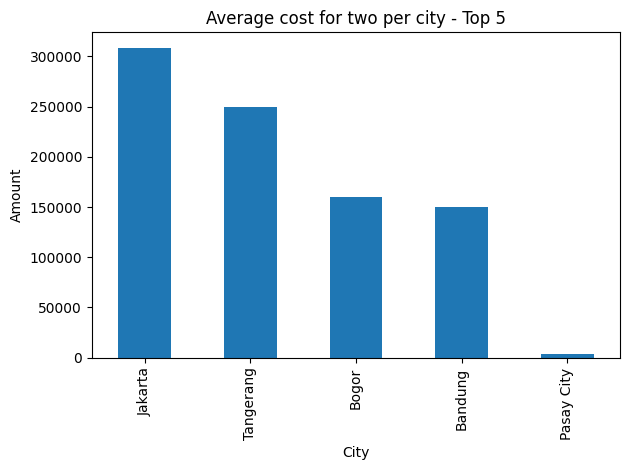

In [11]:
# Group by city and calculate average cost 
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind='bar')
plt.title("Average cost for two per city - Top 5")
plt.xlabel("City")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

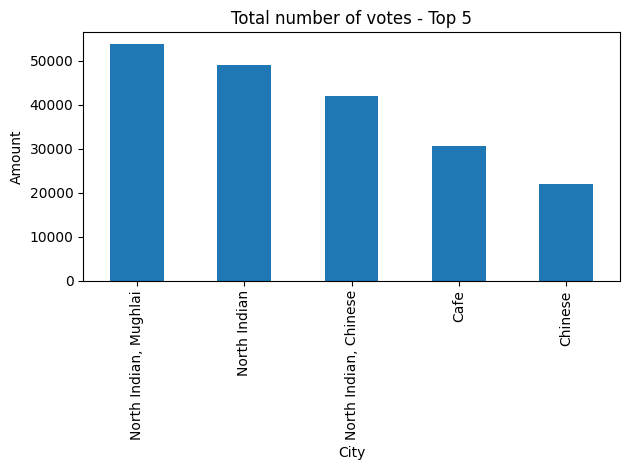

In [12]:
#Cuisines total number of votes 

df.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title("Total number of votes - Top 5")
plt.xlabel("City")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

In [13]:
data = df.groupby("Cuisines")["Votes"].sum().reset_index()
data[data["Votes"] !=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


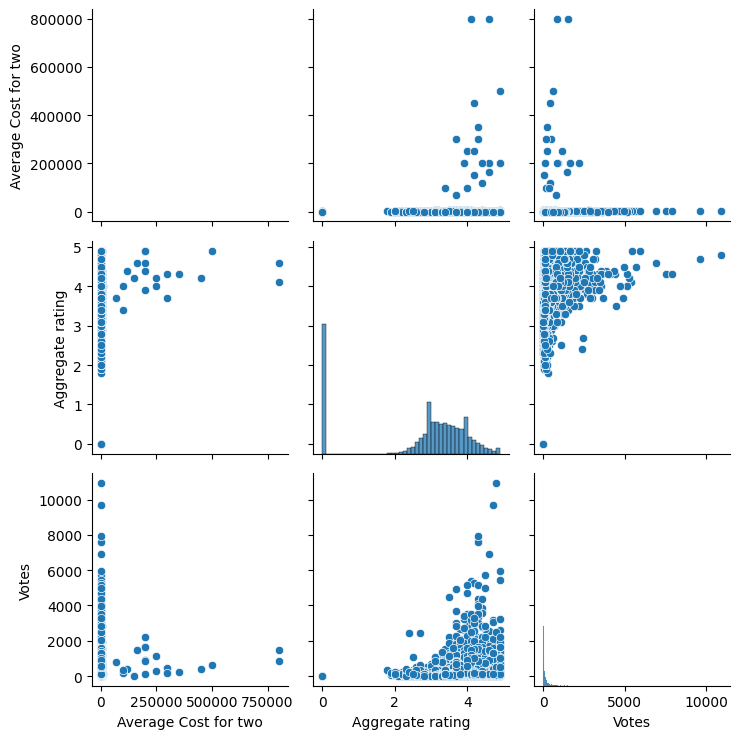

In [14]:
sns.pairplot(df[["Average Cost for two","Aggregate rating", "Votes"]])
plt.tight_layout()
plt.show()

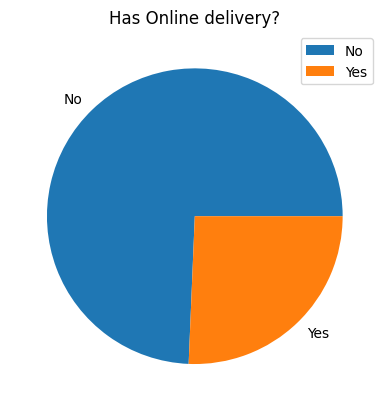

In [15]:
df['Has Online delivery'].value_counts().plot(kind="pie")
plt.title("Has Online delivery?")
plt.ylabel("")
plt.legend()
plt.show()


In [16]:
df= df[df['Rating text'] != "Not rated"] 

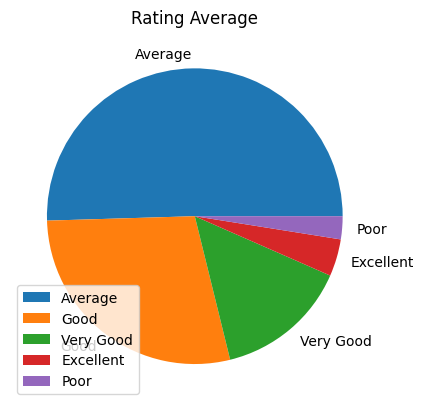

In [17]:
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Average")
plt.ylabel("")
plt.legend()
plt.show()

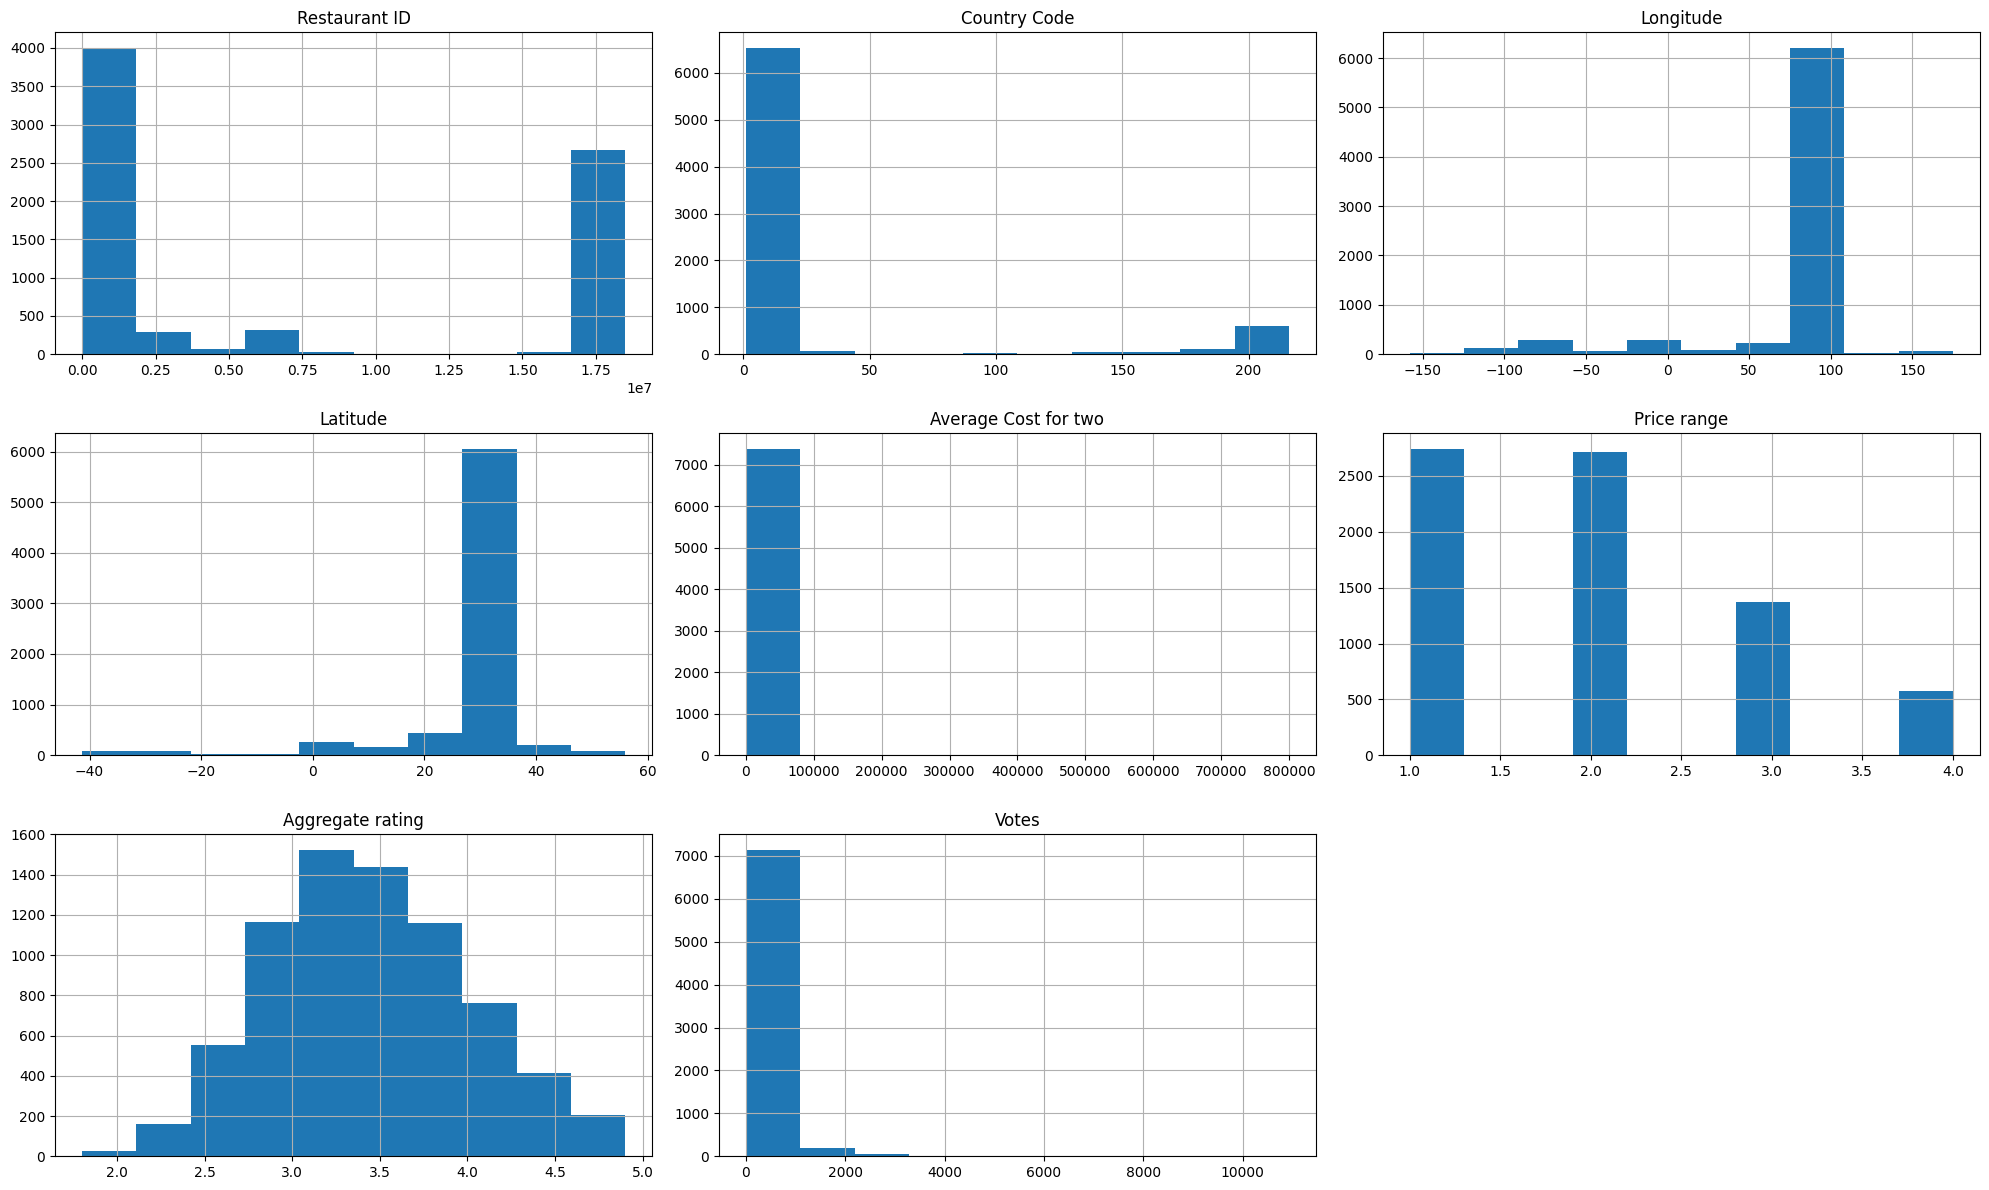

In [18]:
df.hist(figsize=(20,12))
plt.tight_layout()
plt.show()

### Feature Engineering

In [19]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### Feature Creation 

In [20]:
df['Cost_per_person'] = df['Average Cost for two'] / 2
df['Log_Votes'] = np.log1p(df['Votes'])
df['Has_Table_and_Online'] = (
    (df['Has Table booking'] == 'Yes') & (df['Has Online delivery'] == 'Yes')
).astype(int)

In [21]:
df['Rating text'] = df['Rating text'].map({
    'Excellent': 5, 'Very Good': 4, 'Good': 3, 'Average': 2, 'Poor': 1
})

In [22]:
top_cities = df['City'].value_counts().nlargest(20).index
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Others')

#### Droping the Columns

In [23]:
columns_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Country Code', 
    'Address', 'Locality', 'Locality Verbose', 
    'Longitude', 'Latitude', 'Currency', 
    'Switch to order menu', 'Rating color'
]

df.drop(columns=columns_to_drop, inplace=True)

#### One-hot encoding

In [24]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [25]:
categorical_cols

['City',
 'Cuisines',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now']

In [26]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                   501
North Indian, Chinese                          397
North Indian, Mughlai                          294
Cafe                                           252
Fast Food                                      228
                                              ... 
Continental, Italian, North Indian, Mughlai      1
Continental, North Indian, Italian, Chinese      1
Bihari, Lucknowi, North Indian                   1
Asian, Seafood                                   1
Italian, World Cuisine                           1
Name: count, Length: 1715, dtype: int64

In [27]:
counts = df['Cuisines'].value_counts()

In [28]:
df['Cuisines'].nunique()


1715

In [29]:
threshold = 220
repl =counts[counts<= threshold].index

In [30]:
df = df.drop('Cuisines', axis=1).join(
    pd.get_dummies(df['Cuisines'].replace(repl, "Others"), prefix='Cuisine', dtype=int)
)

In [31]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
categorical_cols

['City', 'Has Table booking', 'Has Online delivery', 'Is delivering now']

In [32]:
df = df.drop(categorical_cols, axis=1).join(
    pd.get_dummies(df[categorical_cols], drop_first=True, dtype=int)
)

In [33]:
df.head()

,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Cost_per_person,Log_Votes,Has_Table_and_Online,Cuisine_Cafe,Cuisine_Chinese,...,City_New Delhi,City_Noida,City_Orlando,City_Others,City_Pensacola,City_Rest of Hawaii,City_Singapore,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
0,1100,3,4.8,5,314,550.0,5.752573,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1200,3,4.5,5,591,600.0,6.383507,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,4000,4,4.4,4,270,2000.0,5.602119,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1500,4,4.9,5,365,750.0,5.902633,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1500,4,4.8,5,229,750.0,5.438079,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [34]:
df.dtypes

Average Cost for two               int64
Price range                        int64
Aggregate rating                 float64
Rating text                        int64
Votes                              int64
Cost_per_person                  float64
Log_Votes                        float64
Has_Table_and_Online               int64
Cuisine_Cafe                       int64
Cuisine_Chinese                    int64
Cuisine_Fast Food                  int64
Cuisine_North Indian               int64
Cuisine_North Indian, Chinese      int64
Cuisine_North Indian, Mughlai      int64
Cuisine_Others                     int64
City_Amritsar                      int64
City_Bhubaneshwar                  int64
City_Faridabad                     int64
City_Ghaziabad                     int64
City_Gurgaon                       int64
City_Guwahati                      int64
City_Kochi                         int64
City_Kolkata                       int64
City_Lucknow                       int64
City_Ludhiana   

### Train-Test split

In [35]:
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Aggregate rating']), df['Aggregate rating'], test_size=0.2)

### Scaling 

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest 

In [37]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



In [38]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.8723466904981474
RMSE: 0.19580586917413462


### Hypertuning with Random Search CV

In [39]:


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)
print(search.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


In [40]:
y_pred = search.best_estimator_.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.878228071598297
RMSE: 0.19124199163900257


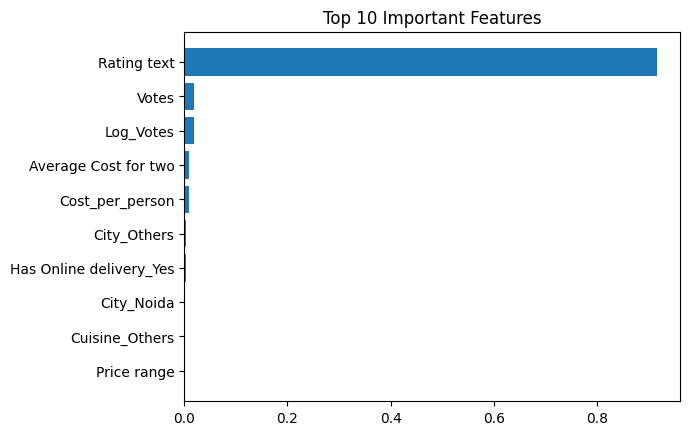

In [41]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.barh(np.array(X_train.columns)[indices], importances[indices])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features")
plt.show()

### XGBoost

In [42]:


xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [43]:
y_pred = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.863909363508896
RMSE: 0.2021732947477516


### Saving the Model 

In [44]:
joblib.dump(search.best_estimator_, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']